Assignment 13

In [2]:
import pandas as pd

file_path = 'heart_disease.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
missing_values = data.isnull().sum()

In [10]:
missing_values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
data[numerical_cols].describe()

,age,trestbps,chol,thalch,oldpeak
count,908.000000,908.000000,908.000000,908.000000,846.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253
std,9.158031,20.401608,112.097949,26.804929,1.093875
min,29.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.750000,120.000000,176.750000,118.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000
75%,60.000000,144.000000,270.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


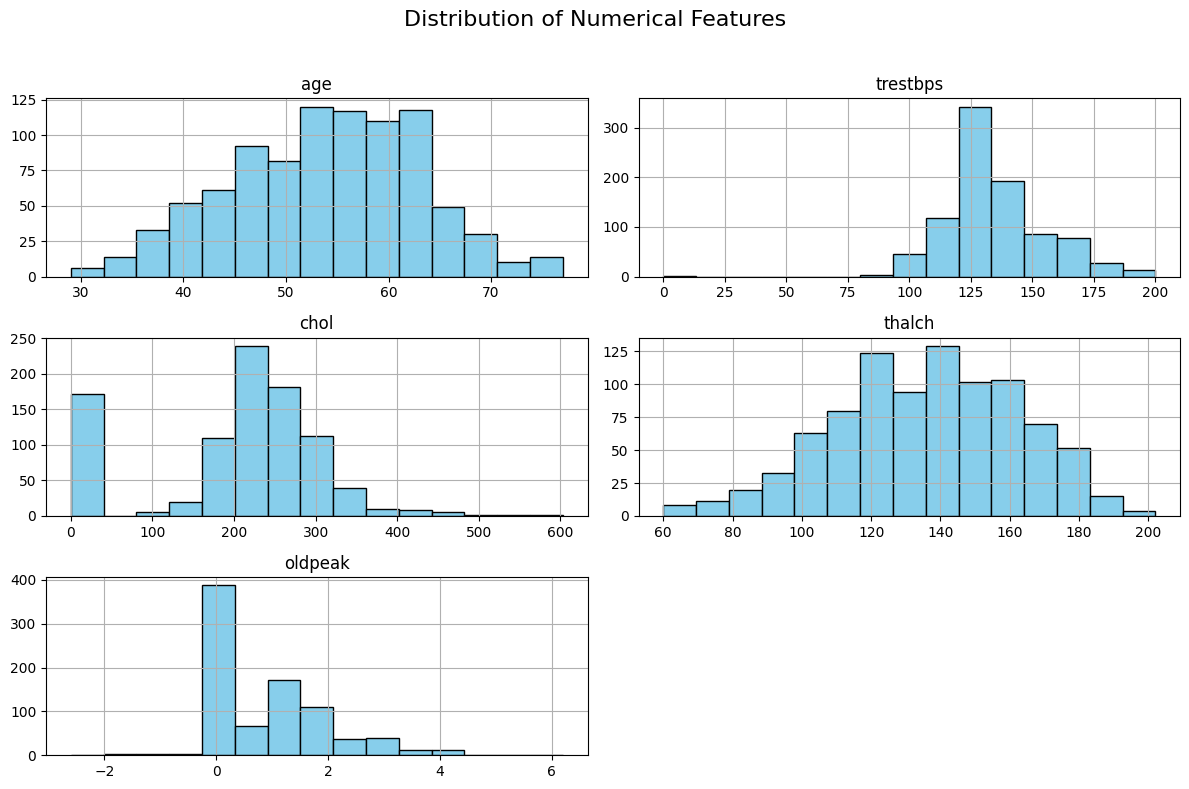

In [8]:
# Plot histograms for numerical columns
data[numerical_cols].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

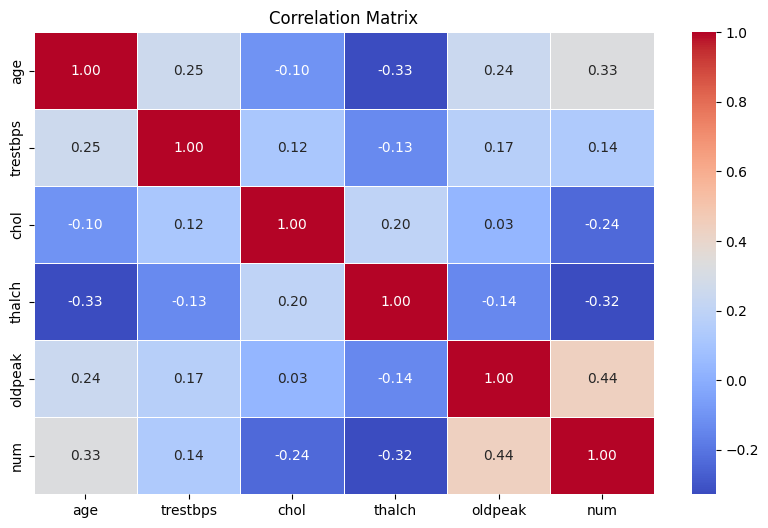

In [9]:
# Visualize correlations
correlation_matrix = data[numerical_cols + ['num']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

 Encode categorical features using LabelEncoder

In [13]:
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

In [14]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

Split the dataset

In [15]:
X = data.drop(columns=['num'])
y = data['num']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
X_train.shape, X_test.shape

((726, 12), (182, 12))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

 Initialize

In [19]:
dt_model = DecisionTreeClassifier(random_state=42)

Train the model

In [20]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Predict on the testing

In [21]:
y_pred = dt_model.predict(X_test)

In [25]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr', average='weighted')

In [27]:
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)


Accuracy: 0.4945
ROC-AUC: 0.6548

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        80
           1       0.38      0.42      0.40        53
           2       0.28      0.23      0.25        22
           3       0.19      0.24      0.21        21
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.32      0.32      0.32       182
weighted avg       0.50      0.49      0.50       182


Confusion Matrix:
[[58 16  0  6  0]
 [10 22  8 12  1]
 [ 4  9  5  3  1]
 [ 2  9  4  5  1]
 [ 2  2  1  1  0]]


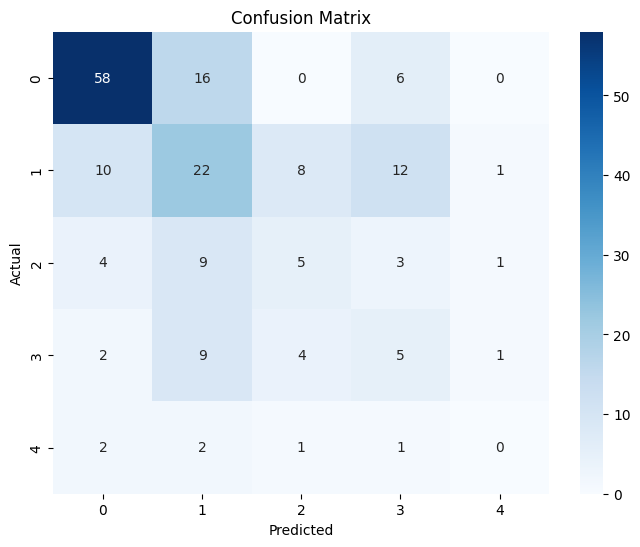

In [28]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
!pip install pandas numpy scikit-learn matplotlib seaborn


In [31]:
from sklearn.model_selection import GridSearchCV


Feature Importances:
     Feature  Importance
2         cp    0.562547
4       chol    0.176597
0        age    0.152926
8      exang    0.087281
3   trestbps    0.020649
1        sex    0.000000
5        fbs    0.000000
6    restecg    0.000000
7     thalch    0.000000
9    oldpeak    0.000000
10     slope    0.000000
11      thal    0.000000


<ipython-input-43-b617193d0917>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


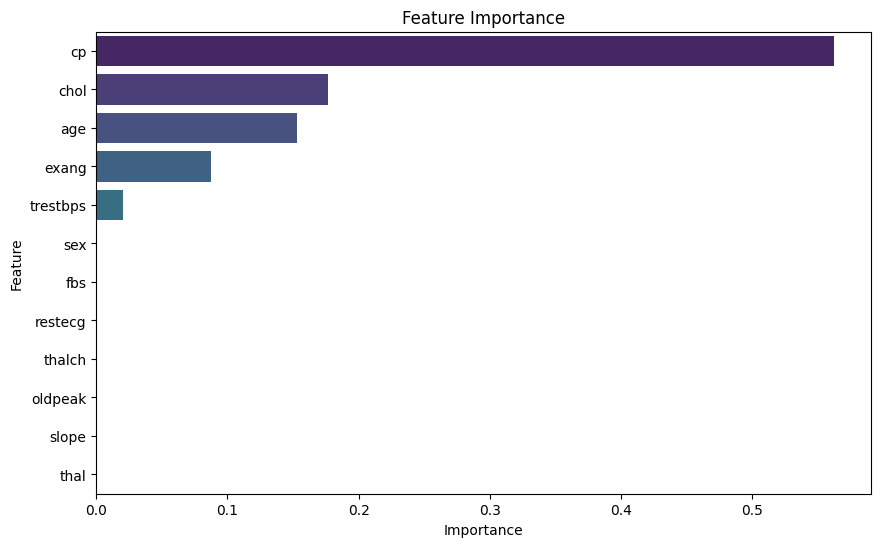

In [43]:
# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.show()
